<a href="https://colab.research.google.com/github/aulialigar/computer-vision/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import os
from google.colab import drive
drive.mount('/content/drive/')

os.chdir('/content/drive/My Drive/TKC')
!ls -a

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
1  2  3


In [53]:
base_dir = '/content/drive/My Drive/TKC'

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)
 
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)

In [55]:
# persiapan data training
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),  
        shuffle = True,
        subset='training',
        class_mode='categorical')

# persiapan data validasi
validation_generator = validation_datagen.flow_from_directory(
        base_dir, 
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),  
        subset='validation',
        class_mode='categorical')

Found 2759 images belonging to 3 classes.
Found 305 images belonging to 3 classes.


<h3>Definisikan Model</h3>

In [56]:
import tensorflow as tf

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[150,150,3]),                              
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [68]:
# Tampilkan model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 38, 38, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 19, 19, 32)      

In [69]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [77]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/100
25/25 - 19s - loss: 0.0219 - acc: 0.9948 - val_loss: 0.6023 - val_acc: 0.8813 - 19s/epoch - 773ms/step
Epoch 2/100
25/25 - 19s - loss: 0.0313 - acc: 0.9912 - val_loss: 0.4452 - val_acc: 0.8938 - 19s/epoch - 770ms/step
Epoch 3/100
25/25 - 19s - loss: 0.0170 - acc: 0.9962 - val_loss: 0.6250 - val_acc: 0.8813 - 19s/epoch - 775ms/step
Epoch 4/100
25/25 - 19s - loss: 0.0208 - acc: 0.9897 - val_loss: 0.5523 - val_acc: 0.8813 - 19s/epoch - 748ms/step
Epoch 5/100
25/25 - 19s - loss: 0.0158 - acc: 0.9974 - val_loss: 0.3064 - val_acc: 0.9312 - 19s/epoch - 758ms/step
Epoch 6/100
25/25 - 19s - loss: 0.0265 - acc: 0.9925 - val_loss: 0.6090 - val_acc: 0.8875 - 19s/epoch - 773ms/step
Epoch 7/100
25/25 - 19s - loss: 0.0181 - acc: 0.9910 - val_loss: 0.3821 - val_acc: 0.8813 - 19s/epoch - 752ms/step
Epoch 8/100
25/25 - 19s - loss: 0.0206 - acc: 0.9887 - val_loss: 0.6882 - val_acc: 0.8438 - 19s/epoch - 770ms/step
Epoch 9/100
25/25 - 19s - loss: 0.0382 - acc: 0.9837 - val_loss: 0.4785 - val_ac

<h3>Evaluasi Model</h3>

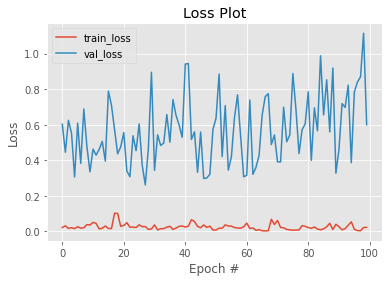

In [78]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

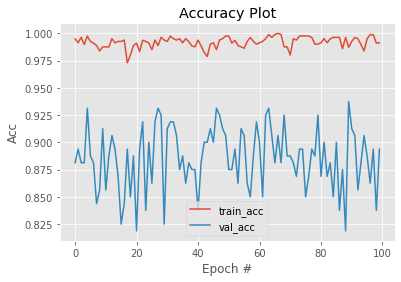

In [79]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [80]:
# from sklearn.metrics import classification_report

# pred = model.predict(validation_generator)
# labels = (pred > 0.5).astype(np.int)

# print(classification_report(validation_generator.classes, labels))

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
def evaluate(model):

  validation_generator = validation_datagen.flow_from_directory(
          base_dir, 
          target_size=(150,150), 
          batch_size=32, 
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_test_samples = len(validation_generator.filenames)

  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['1', '2', '3']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [83]:
evaluate(model)

Found 305 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  



Confusion Matrix

[[ 50  16   4]
 [ 10 132   0]
 [  4   0  89]]


Classification Report

              precision    recall  f1-score   support

           1       0.78      0.71      0.75        70
           2       0.89      0.93      0.91       142
           3       0.96      0.96      0.96        93

    accuracy                           0.89       305
   macro avg       0.88      0.87      0.87       305
weighted avg       0.89      0.89      0.89       305

